In [161]:
import math, pickle, json
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, norm
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_excel('Data_Train.xlsx', engine = 'openpyxl')
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df_train.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
drop_cols = ['New_Price']

In [6]:
df_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


### Feature Engineering: Generate New Feature: Company Name

In [7]:
def generate_company_name(x):
    tokens = x.split()
    return tokens[0]

In [8]:
df_train['Company_Name'] = df_train['Name'].apply(generate_company_name)

In [9]:
df_train['Company_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [10]:
df_train['Company_Name'].replace({'ISUZU': 'Isuzu', 'Land': 'Land Rover'}, inplace = True)

In [11]:
df_train['Company_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [12]:
ohe_cols = ['Company_Name']

In [13]:
drop_cols.append('Name')
drop_cols.append('Company_Name')

In [14]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi


In [15]:
df_train.dropna(subset = ['Engine', 'Power', 'Mileage'], inplace = True)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5981 non-null   object 
 1   Location           5981 non-null   object 
 2   Year               5981 non-null   int64  
 3   Kilometers_Driven  5981 non-null   int64  
 4   Fuel_Type          5981 non-null   object 
 5   Transmission       5981 non-null   object 
 6   Owner_Type         5981 non-null   object 
 7   Mileage            5981 non-null   object 
 8   Engine             5981 non-null   object 
 9   Power              5981 non-null   object 
 10  Seats              5975 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              5981 non-null   float64
 13  Company_Name       5981 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 700.9+ KB


In [17]:
df_train[df_train['Seats'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_Name
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,NaN,3.60,Ford
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,NaN,1.70,Honda
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,NaN,1.50,Maruti
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8 kmpl,2953 CC,null bhp,NaN,NaN,7.00,Ford
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,NaN,2.50,Maruti
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,NaN,1.75,Maruti


In [18]:
df_train['Seats'].fillna(5.0, inplace = True)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seats', ylabel='count'>

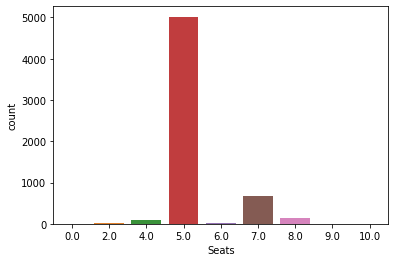

In [19]:
sns.countplot(df_train['Seats'])

In [20]:
df_train['Seats'].value_counts()

5.0     5018
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [21]:
df_train['Price'].groupby(df_train['Seats']).mean()

Seats
0.0     18.000000
2.0     55.211875
4.0     20.752525
5.0      8.470498
6.0      9.511290
7.0     14.837463
8.0      7.458881
9.0      4.450000
10.0     4.280000
Name: Price, dtype: float64

In [22]:
df_train['Price'].groupby(df_train['Seats']).min()

Seats
0.0     18.00
2.0      3.00
4.0      0.44
5.0      0.45
6.0      1.70
7.0      0.60
8.0      0.85
9.0      4.10
10.0     3.50
Name: Price, dtype: float64

In [23]:
df_train['Price'].groupby(df_train['Seats']).max()

Seats
0.0      18.00
2.0     120.00
4.0      79.00
5.0     160.00
6.0      40.00
7.0      79.00
8.0      22.55
9.0       4.75
10.0      5.50
Name: Price, dtype: float64

In [24]:
seats = []
for x in df_train['Seats'].values.tolist():
    if x == 0.0 or x == 2.0:
        seats.append(2.0)
    elif x >= 4.0 and x <= 6.0:
        seats.append(5.0)
    elif x >= 7.0:
        seats.append(7.0)
seats = np.array(seats)

In [25]:
df_train['Seats'] = seats.T

In [26]:
drop_cols.append('Seats')

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5981 non-null   object 
 1   Location           5981 non-null   object 
 2   Year               5981 non-null   int64  
 3   Kilometers_Driven  5981 non-null   int64  
 4   Fuel_Type          5981 non-null   object 
 5   Transmission       5981 non-null   object 
 6   Owner_Type         5981 non-null   object 
 7   Mileage            5981 non-null   object 
 8   Engine             5981 non-null   object 
 9   Power              5981 non-null   object 
 10  Seats              5981 non-null   float64
 11  New_Price          823 non-null    object 
 12  Price              5981 non-null   float64
 13  Company_Name       5981 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 860.9+ KB


In [28]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi


In [29]:
df_train[df_train['Power'] == 'null bhp'].count()

Name                 107
Location             107
Year                 107
Kilometers_Driven    107
Fuel_Type            107
Transmission         107
Owner_Type           107
Mileage              107
Engine               107
Power                107
Seats                107
New_Price              0
Price                107
Company_Name         107
dtype: int64

In [30]:
df_train[df_train['Power'] == 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_Name
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,NaN,2.00,Ford
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.30,Hyundai
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,NaN,2.10,Hyundai
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,0.85,Hyundai
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.67,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,NaN,1.20,Hyundai
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,5.0,NaN,1.75,Maruti
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,NaN,2.85,Skoda
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,5.0,NaN,1.70,Mahindra


In [31]:
for row in df_train[df_train['Engine'] == '1086 CC'].values.tolist():
    print(row)

['Hyundai Santro Xing XL', 'Hyderabad', 2005, 87591, 'Petrol', 'Manual', 'First', '0.0 kmpl', '1086 CC', 'null bhp', 5.0, nan, 1.3, 'Hyundai']
['Hyundai Santro Xing XO', 'Hyderabad', 2007, 73745, 'Petrol', 'Manual', 'First', '17.0 kmpl', '1086 CC', 'null bhp', 5.0, nan, 2.1, 'Hyundai']
['Hyundai Santro Xing XL eRLX Euro III', 'Mumbai', 2005, 102000, 'Petrol', 'Manual', 'Second', '17.0 kmpl', '1086 CC', 'null bhp', 5.0, nan, 0.85, 'Hyundai']
['Hyundai Santro Xing XO eRLX Euro II', 'Kochi', 2008, 80759, 'Petrol', 'Manual', 'Third', '17.0 kmpl', '1086 CC', 'null bhp', 5.0, nan, 1.67, 'Hyundai']
['Hyundai i10 Magna 1.1', 'Kochi', 2017, 52340, 'Petrol', 'Manual', 'First', '19.81 kmpl', '1086 CC', '68.05 bhp', 5.0, nan, 4.04, 'Hyundai']
['Hyundai i10 Magna 1.1', 'Pune', 2012, 44000, 'Petrol', 'Manual', 'Second', '19.81 kmpl', '1086 CC', '68.05 bhp', 5.0, nan, 2.9, 'Hyundai']
['Hyundai Santro Xing XO eRLX Euro II', 'Mumbai', 2007, 72000, 'Petrol', 'Manual', 'Third', '17.0 kmpl', '1086 CC', 'n

In [32]:
for index in df_train[((df_train['Mileage'] == '17.0 kmpl') | (df_train['Mileage'] == '0.0 kmpl')) & (df_train['Power'] == 'null bhp')].index.tolist():
    df_train.at[index, 'Power'] = '63 bhp'

In [33]:
df_train[df_train['Power'] == 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_Name
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,NaN,2.00,Ford
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.8 kmpl,1248 CC,null bhp,5.0,NaN,4.10,Maruti
308,Maruti Swift VDI BSIV,Kolkata,2011,60020,Diesel,Manual,First,17.8 kmpl,1248 CC,null bhp,5.0,NaN,2.50,Maruti
472,Ford Fiesta 1.6 SXI ABS Duratec,Chennai,2009,80524,Petrol,Manual,Second,15.3 kmpl,1596 CC,null bhp,5.0,NaN,2.50,Ford
648,Tata Indica DLS,Jaipur,2009,82000,Diesel,Manual,Second,13.5 kmpl,1405 CC,null bhp,5.0,NaN,0.75,Tata
739,Maruti Swift VDI BSIV,Bangalore,2007,60000,Diesel,Manual,Second,17.8 kmpl,1248 CC,null bhp,5.0,NaN,3.40,Maruti
829,Toyota Etios Liva G,Mumbai,2012,29605,Petrol,Manual,First,18.3 kmpl,1197 CC,null bhp,5.0,NaN,2.44,Toyota
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0 kmpl,3436 CC,null bhp,2.0,NaN,40.00,Porsche
934,Toyota Etios GD,Kolkata,2012,60000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,2.95,Toyota
1068,Toyota Etios Liva GD,Pune,2012,225000,Diesel,Manual,Second,23.59 kmpl,1364 CC,null bhp,5.0,NaN,2.60,Toyota


In [34]:
df_train.at[2527, 'Power'] = '63 bhp'

In [35]:
for index in df_train[((df_train['Name'] == 'Maruti Swift VDI BSIV') | (df_train['Name'] == 'Maruti Swift VDI BSIV W ABS')) & (df_train['Power'] == 'null bhp')].index.tolist():
    df_train.at[index, 'Power'] = '74 bhp'

In [36]:
df_train[df_train['Power'] == 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_Name
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,NaN,2.00,Ford
472,Ford Fiesta 1.6 SXI ABS Duratec,Chennai,2009,80524,Petrol,Manual,Second,15.3 kmpl,1596 CC,null bhp,5.0,NaN,2.50,Ford
648,Tata Indica DLS,Jaipur,2009,82000,Diesel,Manual,Second,13.5 kmpl,1405 CC,null bhp,5.0,NaN,0.75,Tata
829,Toyota Etios Liva G,Mumbai,2012,29605,Petrol,Manual,First,18.3 kmpl,1197 CC,null bhp,5.0,NaN,2.44,Toyota
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0 kmpl,3436 CC,null bhp,2.0,NaN,40.00,Porsche
934,Toyota Etios GD,Kolkata,2012,60000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,2.95,Toyota
1068,Toyota Etios Liva GD,Pune,2012,225000,Diesel,Manual,Second,23.59 kmpl,1364 CC,null bhp,5.0,NaN,2.60,Toyota
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5 kmpl,1242 CC,null bhp,5.0,NaN,0.85,Fiat
1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7 kmpl,1598 CC,null bhp,5.0,NaN,1.50,Chevrolet
1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.6 kmpl,2523 CC,null bhp,7.0,NaN,7.00,Mahindra


In [37]:
for index in df_train[((df_train['Name'] == 'Toyota Etios Liva GD') | (df_train['Name'] == 'Toyota Etios Liva G') | (df_train['Name'] == 'Toyota Etios GD')) & (df_train['Power'] == 'null bhp')].index.tolist():
    df_train.at[index, 'Power'] = '67.04 bhp'

In [38]:
df_train[df_train['Power'] == 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_Name
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,NaN,2.00,Ford
472,Ford Fiesta 1.6 SXI ABS Duratec,Chennai,2009,80524,Petrol,Manual,Second,15.3 kmpl,1596 CC,null bhp,5.0,NaN,2.50,Ford
648,Tata Indica DLS,Jaipur,2009,82000,Diesel,Manual,Second,13.5 kmpl,1405 CC,null bhp,5.0,NaN,0.75,Tata
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0 kmpl,3436 CC,null bhp,2.0,NaN,40.00,Porsche
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5 kmpl,1242 CC,null bhp,5.0,NaN,0.85,Fiat
1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7 kmpl,1598 CC,null bhp,5.0,NaN,1.50,Chevrolet
1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.6 kmpl,2523 CC,null bhp,7.0,NaN,7.00,Mahindra
1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,19.5 kmpl,1461 CC,null bhp,5.0,NaN,2.10,Nissan
1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0 kmpl,2148 CC,null bhp,5.0,NaN,5.00,Mercedes-Benz
2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0 kmpl,3436 CC,null bhp,2.0,NaN,43.00,Porsche


In [39]:
df_train.at[76, 'Power'] = '67 bhp'
df_train.at[3290, 'Power'] = '67 bhp'

df_train.at[472, 'Power'] = '99.6 bhp'

df_train.at[648, 'Power'] = '52.8 bhp'
df_train.at[2450, 'Power'] = '52.8 bhp'
df_train.at[3589, 'Power'] = '52.8 bhp'

df_train.at[926, 'Power'] = '315 bhp'
df_train.at[2305, 'Power'] = '315 bhp'

df_train.at[2369, 'Power'] = '68 bhp'
df_train.at[3882, 'Power'] = '68 bhp'
df_train.at[5893, 'Power'] = '68 bhp'

df_train.at[3733, 'Power'] = '85 bhp'
df_train.at[4351, 'Power'] = '85 bhp'
df_train.at[4830, 'Power'] = '85 bhp'

df_train.at[3533, 'Power'] = '170 bp'

df_train.at[3638, 'Power'] = '118 bp'

df_train.at[1319, 'Power'] = '72 bhp'

df_train.at[1555, 'Power'] = '104 bhp'

df_train.at[1578, 'Power'] = '70 bhp'

df_train.at[1672, 'Power'] = '65 bhp'

df_train.at[1999, 'Power'] = '170 bhp'
df_train.at[4714, 'Power'] = '170 bhp'

df_train.at[3800, 'Power'] = '197 bhp'

df_train.at[3999, 'Power'] = '261 bhp'

df_train.at[4077, 'Power'] = '94 bhp'

df_train.at[4709, 'Power'] = '46 bhp'

df_train.at[5438, 'Power'] = '153.8 bhp'

df_train.at[5925, 'Power'] = '157.8 bhp'

In [40]:
df_train[df_train['Power'] == 'null bhp'].count()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Company_Name         0
dtype: int64

In [41]:
def split_values(x):
    tokens = x.split()
    if "." in tokens[0]:
        return float(tokens[0])
    else:
        
        return int(tokens[0])

In [42]:
df_train['Mileage_Float'] = df_train['Mileage'].apply(split_values)
df_train['Engine_Int'] = df_train['Engine'].apply(split_values)
df_train['Power_Float'] = df_train['Power'].apply(split_values)

In [43]:
drop_cols.append('Mileage')
drop_cols.append('Engine')
drop_cols.append('Power')

In [44]:
drop_cols

['New_Price', 'Name', 'Company_Name', 'Seats', 'Mileage', 'Engine', 'Power']

In [45]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_Name,Mileage_Float,Engine_Int,Power_Float
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968,140.80


<AxesSubplot:xlabel='Company_Name', ylabel='Price'>

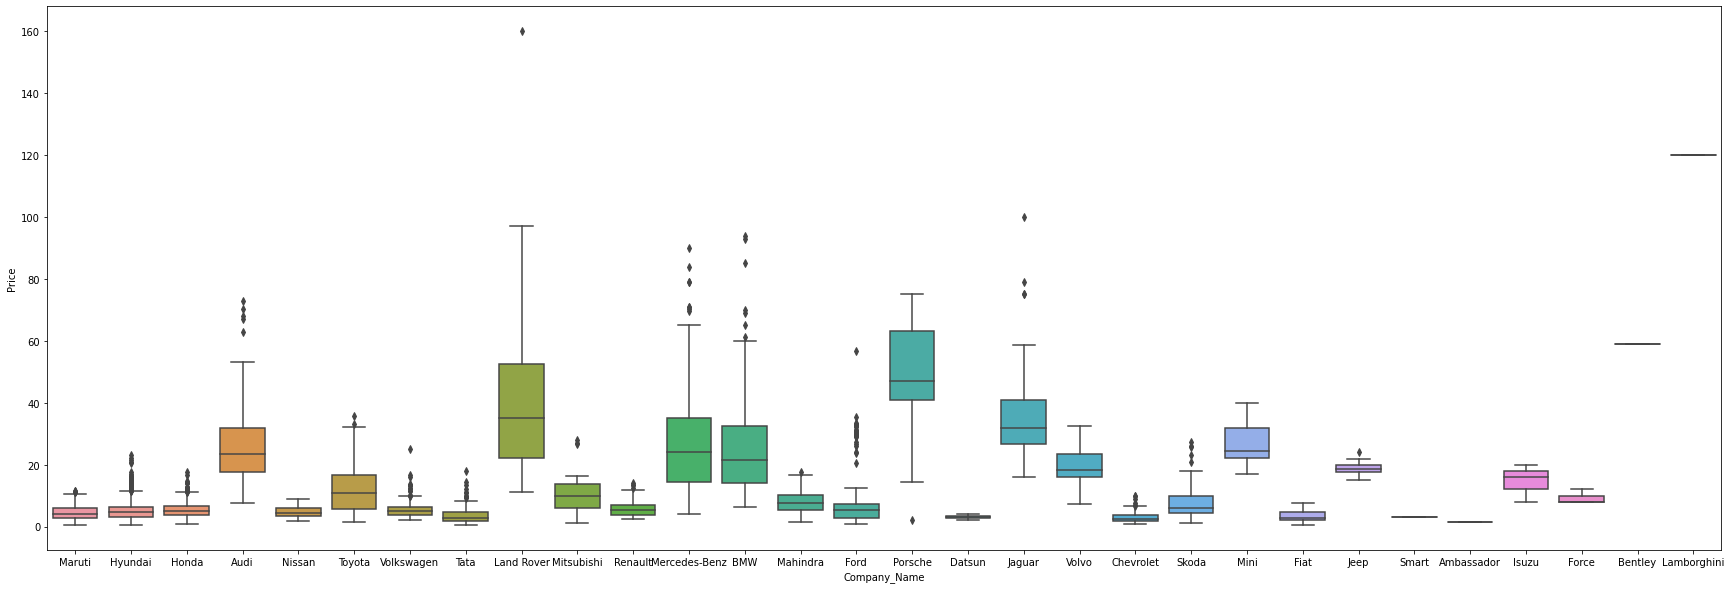

In [46]:
plt.figure(figsize = (30, 10))
sns.boxplot(x = 'Company_Name', y = 'Price', data = df_train)

In [47]:
df_train[['Company_Name', 'Price']].groupby(df_train['Company_Name']).mean()

,Price
Company_Name,
Ambassador,1.350000
Audi,25.537712
BMW,25.439618
Bentley,59.000000
Chevrolet,3.044463
Datsun,3.049231
Fiat,3.340800
Force,9.333333
Ford,6.889400


In [48]:
df_train[['Price']].groupby(df_train['Company_Name']).min()

,Price
Company_Name,
Ambassador,1.35
Audi,7.50
BMW,6.30
Bentley,59.00
Chevrolet,0.75
Datsun,2.25
Fiat,0.55
Force,8.00
Ford,0.69


In [49]:
df_train[['Price']].groupby(df_train['Company_Name']).max()

,Price
Company_Name,
Ambassador,1.35
Audi,72.94
BMW,93.67
Bentley,59.00
Chevrolet,9.87
Datsun,3.95
Fiat,7.71
Force,12.00
Ford,56.80


In [50]:
pd.crosstab(df_train['Company_Name'], df_train['Owner_Type'])

Owner_Type,First,Fourth & Above,Second,Third
Company_Name,,,,
Ambassador,0,0,0,1
Audi,189,0,45,2
BMW,203,0,53,6
Bentley,1,0,0,0
Chevrolet,89,0,25,7
Datsun,13,0,0,0
Fiat,17,0,7,1
Force,3,0,0,0
Ford,234,2,52,12


In [51]:
replace_dict = {'Owner_Type': {'First': 3, 'Second': 2, 'Third': 1, 'Fourth & Above': 0}}

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

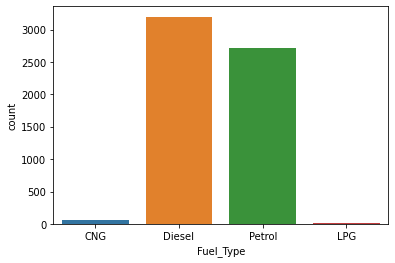

In [52]:
sns.countplot(df_train['Fuel_Type'])

In [53]:
ohe_cols.append('Fuel_Type')
drop_cols.append('Fuel_Type')

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

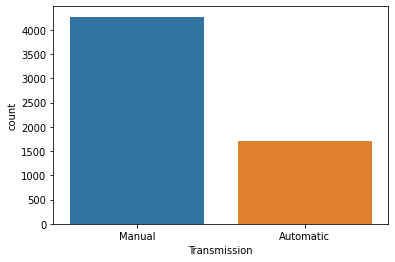

In [54]:
sns.countplot(df_train['Transmission'])

In [55]:
pd.crosstab(df_train['Fuel_Type'], df_train['Transmission'])

Transmission,Automatic,Manual
Fuel_Type,,
CNG,0,56
Diesel,1101,2096
LPG,0,10
Petrol,609,2109


In [56]:
ohe_cols.append('Transmission')
drop_cols.append('Transmission')

## EDA on Target: Price

In [57]:
df_train['Price'].describe()

count    5981.000000
mean        9.495133
std        11.202164
min         0.440000
25%         3.500000
50%         5.650000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

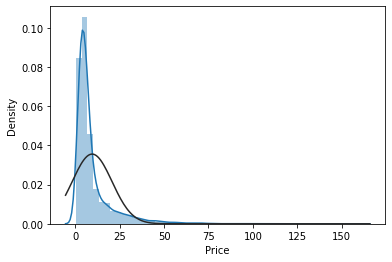

In [58]:
sns.distplot(df_train['Price'], fit = norm)

In [59]:
log_price = np.log(1 + df_train['Price'].values)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

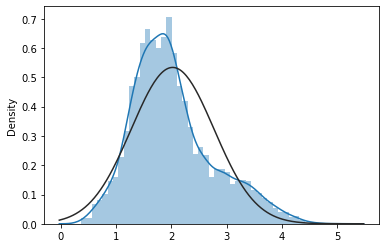

In [60]:
sns.distplot(log_price, fit = norm)

In [61]:
def standardize(x):
    return (x - x.mean()) / x.std()

<AxesSubplot:ylabel='Price'>

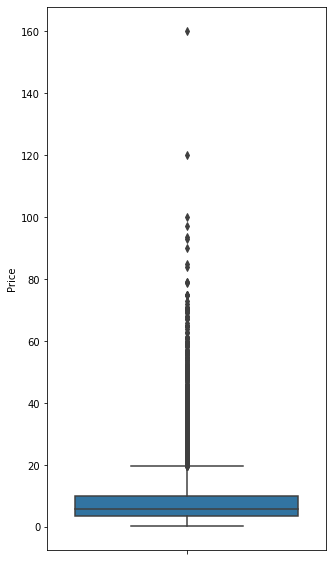

In [62]:
plt.figure(figsize = (5, 10))
sns.boxplot(y = df_train['Price'])

In [63]:
price = df_train['Price'].values
bcp, p_lambda, (min_ci, max_ci) = boxcox(price, alpha = 0.95)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

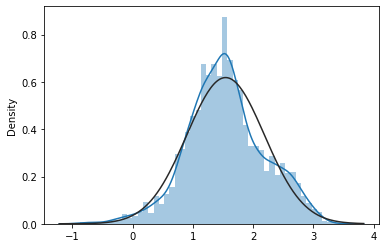

In [64]:
sns.distplot(bcp, fit = norm)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

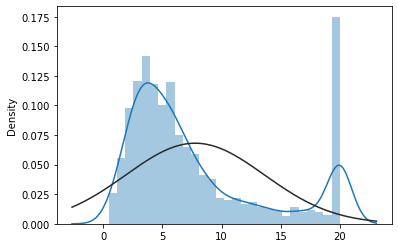

In [65]:
clip = 20
clip_price = [clip if x >= clip else x for x in df_train['Price'].values]
sns.distplot(clip_price, fit = norm)

In [66]:
clip_bcp, clip_lambda, (min_clip_ci, max_clip_ci) = boxcox(clip_price, alpha = 0.95)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

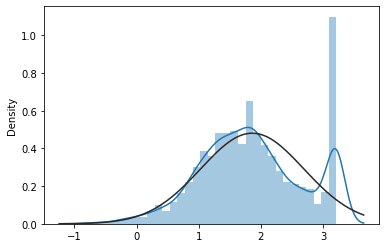

In [67]:
sns.distplot(clip_bcp, fit = norm)

In [68]:
df_train['Price'].groupby(df_train['Fuel_Type']).mean()

Fuel_Type
CNG        3.516786
Diesel    12.835217
LPG        2.487000
Petrol     5.715375
Name: Price, dtype: float64

In [69]:
df_train['Price'].groupby(df_train['Fuel_Type']).min()

Fuel_Type
CNG       1.20
Diesel    0.60
LPG       1.45
Petrol    0.44
Name: Price, dtype: float64

In [70]:
df_train['Price'].groupby(df_train['Fuel_Type']).max()

Fuel_Type
CNG         8.35
Diesel    160.00
LPG         3.20
Petrol    120.00
Name: Price, dtype: float64

In [71]:
df_train[df_train['Company_Name'] == 'Land Rover']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_Name,Mileage_Float,Engine_Int,Power_Float
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,Land Rover,12.70,2179,187.70
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,Land Rover,0.00,2179,115.00
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,Land Rover,12.70,2179,187.70
311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,44.00,Land Rover,12.70,2179,187.70
399,Land Rover Range Rover 2.2L Dynamic,Hyderabad,2012,56000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,30.00,Land Rover,12.70,2179,187.70
404,Land Rover Range Rover 2.2L Prestige,Coimbatore,2017,34990,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,53.83,Land Rover,12.70,2179,187.70
410,Land Rover Range Rover 2.2L Pure,Coimbatore,2014,95649,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,29.67,Land Rover,12.70,2179,187.70
480,Land Rover Range Rover Evoque 2.0 TD4 Pure,Delhi,2015,24000,Diesel,Automatic,Second,15.68 kmpl,1999 CC,177 bhp,5.0,NaN,33.50,Land Rover,15.68,1999,177.00
521,Land Rover Range Rover HSE Dynamic,Coimbatore,2017,49275,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,45.64,Land Rover,12.70,2179,187.70
701,Land Rover Freelander 2 SE,Chennai,2011,109000,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,NaN,16.50,Land Rover,12.39,2179,147.51


In [72]:
df_train[['Company_Name', 'Name', 'Price']][df_train['Price'] == df_train['Price'].max()]

,Company_Name,Name,Price
4079,Land Rover,Land Rover Range Rover 3.0 Diesel LWB Vogue,160.0


### Feature: Kilometers Driven

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Density'>

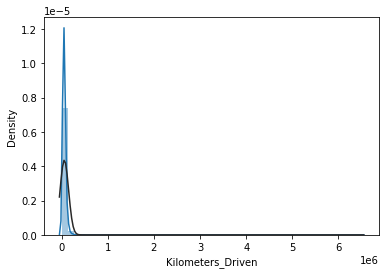

In [73]:
sns.distplot(df_train['Kilometers_Driven'], fit = norm)

In [74]:
df_train['Kilometers_Driven'].max()

6500000

In [75]:
# df_train.drop(df_train[df_train['Kilometers_Driven'] == df_train['Kilometers_Driven'].max()].index, inplace = True)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Density'>

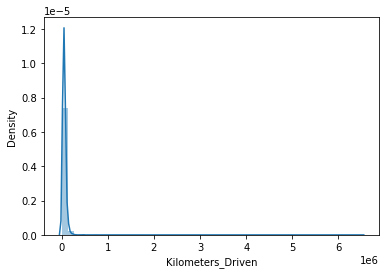

In [76]:
sns.distplot(df_train['Kilometers_Driven'])

In [77]:
log_kd = np.log(1 + df_train['Kilometers_Driven'].values)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

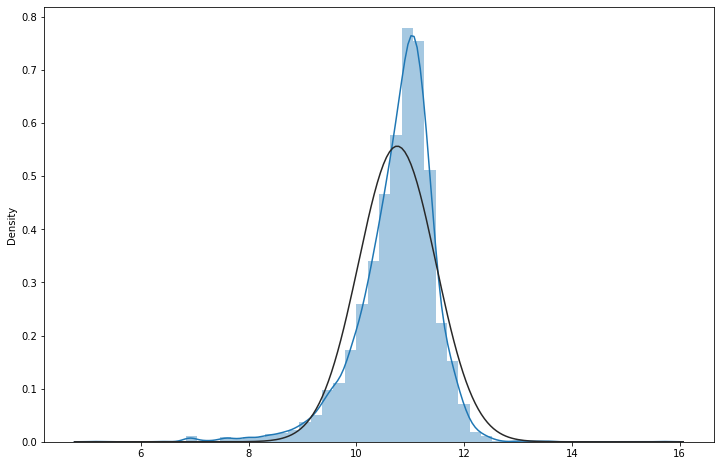

In [78]:
plt.figure(figsize = (12, 8))
sns.distplot(log_kd, fit = norm)

In [79]:
bckd, kd_lambda, (min_kd_ci, max_kd_ci) = boxcox(df_train['Kilometers_Driven'].values, alpha = 0.95)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

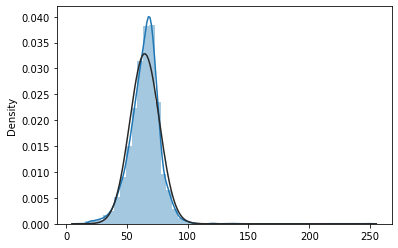

In [80]:
sns.distplot(bckd, fit = norm)

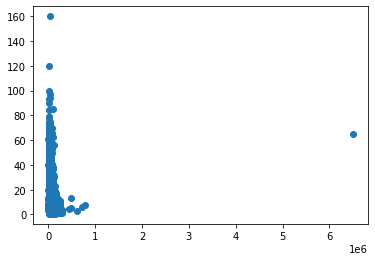

In [81]:
plt.scatter(df_train['Kilometers_Driven'], df_train['Price'])

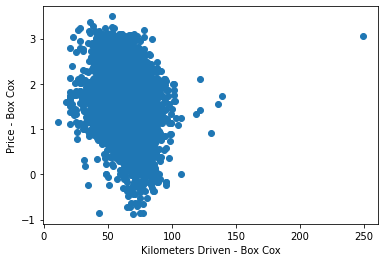

In [82]:
plt.xlabel('Kilometers Driven - Box Cox')
plt.ylabel('Price - Box Cox')
plt.scatter(bckd, bcp)

<AxesSubplot:xlabel='Year', ylabel='Price'>

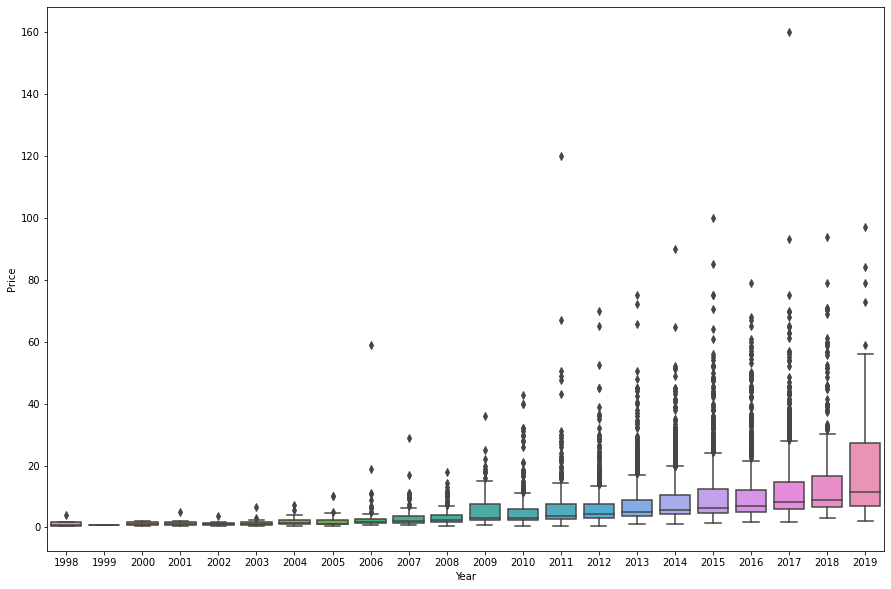

In [83]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'Year', y = 'Price', data = df_train)

In [84]:
year_label = {x: y for x, y in list(zip(sorted(df_train['Year'].unique()), [i for i in range(len(df_train['Year'].unique()))]))}
replace_dict['Year'] = year_label

In [85]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_Name,Mileage_Float,Engine_Int,Power_Float
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968,140.80


In [86]:
replace_dict

{'Owner_Type': {'First': 3, 'Second': 2, 'Third': 1, 'Fourth & Above': 0},
 'Year': {1998: 0,
  1999: 1,
  2000: 2,
  2001: 3,
  2002: 4,
  2003: 5,
  2004: 6,
  2005: 7,
  2006: 8,
  2007: 9,
  2008: 10,
  2009: 11,
  2010: 12,
  2011: 13,
  2012: 14,
  2013: 15,
  2014: 16,
  2015: 17,
  2016: 18,
  2017: 19,
  2018: 20,
  2019: 21}}

In [87]:
df_train['Location'].value_counts()

Mumbai        785
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       531
Chennai       492
Jaipur        411
Bangalore     354
Ahmedabad     223
Name: Location, dtype: int64

In [88]:
ohe_cols.append('Location')
drop_cols.append('Location')

In [89]:
ohe_cols

['Company_Name', 'Fuel_Type', 'Transmission', 'Location']

### Feature: Mileage

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage_Float', ylabel='Density'>

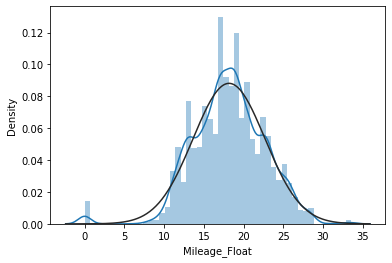

In [90]:
sns.distplot(df_train['Mileage_Float'], fit = norm)

In [91]:
standardized_mileage = standardize(df_train['Mileage_Float'].values)
mileage_mean = df_train['Mileage_Float'].mean()
mileage_std = df_train['Mileage_Float'].std()

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

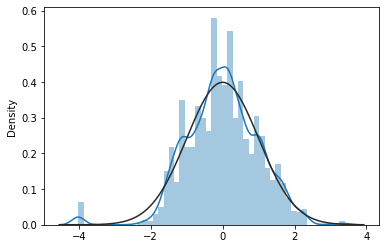

In [92]:
sns.distplot(standardized_mileage, fit = norm)

### Feature: Engine

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Engine_Int', ylabel='Density'>

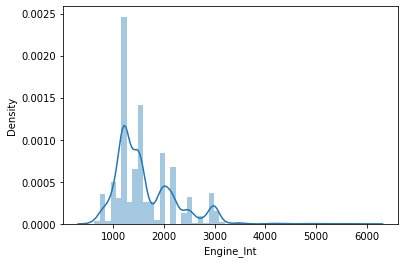

In [93]:
sns.distplot(df_train['Engine_Int'])

In [94]:
log_engine = np.log(1 + df_train['Engine_Int'].values)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

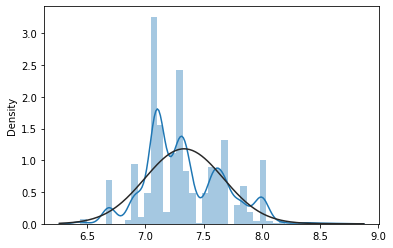

In [95]:
sns.distplot(log_engine, fit = norm)

In [96]:
df_train['Engine_Int'][(df_train['Engine_Int'] > 3000) & (df_train['Engine_Int'] < 4000)].value_counts()

3198    15
3498    12
3436     2
3597     2
3197     1
3200     1
Name: Engine_Int, dtype: int64

In [97]:
eng_clip = 3597
eng_clip_cap = np.array([eng_clip if x >= eng_clip else x for x in df_train['Engine_Int'].values])

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

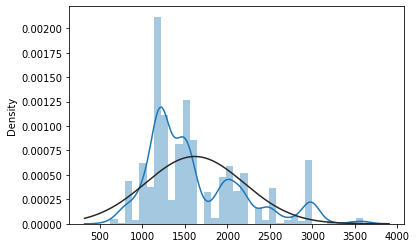

In [98]:
sns.distplot(eng_clip_cap, fit = norm)

In [99]:
log_clip_engine = np.log(1 + eng_clip_cap)

In [100]:
bc_eng_clip_cap, clip_eng_lambda, (min_eng_clip_ci, max_eng_clip_ci) = boxcox(log_clip_engine, alpha = 0.95)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

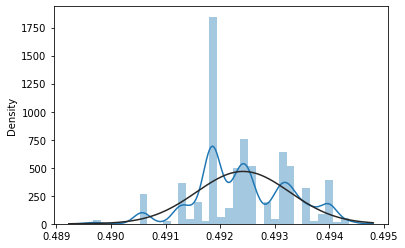

In [101]:
sns.distplot(bc_eng_clip_cap, fit = norm)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

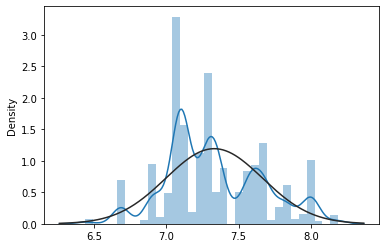

In [102]:
sns.distplot(log_clip_engine, fit = norm)

In [103]:
bc_eng, eng_lambda, (eng_min_ci, eng_max_ci) = boxcox(df_train['Engine_Int'].values, alpha = 0.95)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

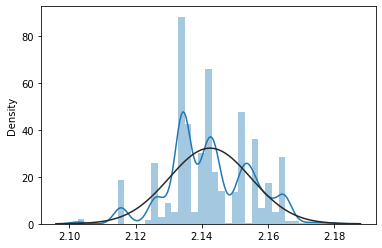

In [104]:
sns.distplot(bc_eng, fit = norm)

### Feature: Power (in bhp)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Power_Float', ylabel='Density'>

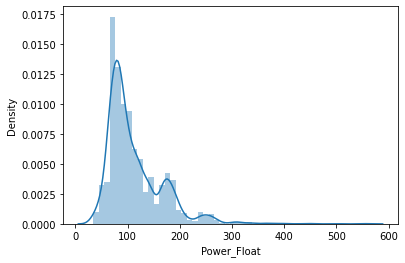

In [105]:
sns.distplot(df_train['Power_Float'])

In [106]:
log_power = np.log(1 + df_train['Power_Float'].values)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

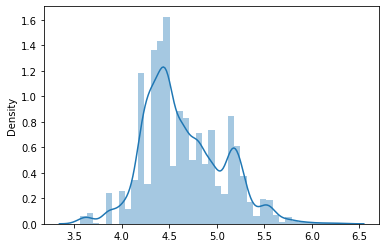

In [107]:
sns.distplot(log_power)

In [108]:
bc_power, pow_lambda, (pow_min_ci, pow_max_ci) = boxcox(df_train['Power_Float'].values, alpha = 0.95)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

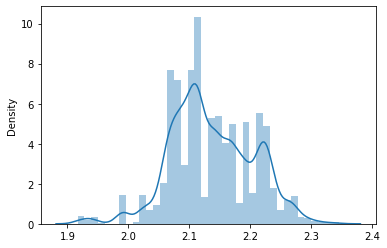

In [109]:
sns.distplot(bc_power)

In [110]:
pow_clip = 300
power_clip_values = np.array([pow_clip if x >= pow_clip else x for x in df_train['Power_Float'].values])

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

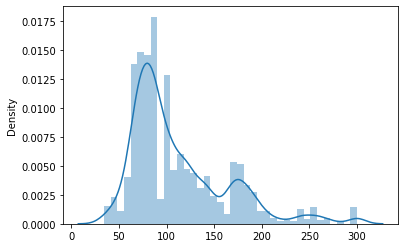

In [111]:
sns.distplot(power_clip_values)

In [112]:
log_power_clip = np.log(1 + power_clip_values)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

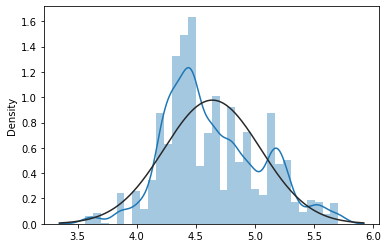

In [113]:
sns.distplot(log_power_clip, fit = norm)

In [114]:
bc_power_clip, bc_pow_lmbda, (min_bc_pow_clip_ci, max_bc_pow_clip_ci) = boxcox(power_clip_values, alpha = 0.95)

/home/sarvesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

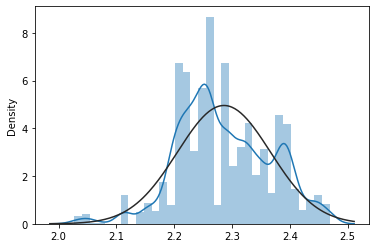

In [115]:
sns.distplot(bc_power_clip, fit = norm)

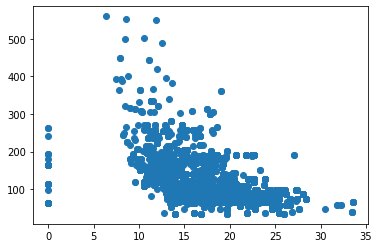

In [116]:
plt.scatter(df_train['Mileage_Float'], df_train['Power_Float'])

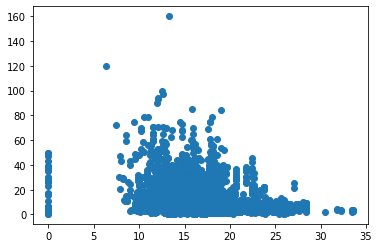

In [117]:
plt.scatter(df_train['Mileage_Float'], df_train['Price'])

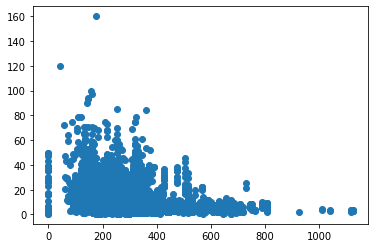

In [118]:
plt.scatter(df_train['Mileage_Float'] * df_train['Mileage_Float'], df_train['Price'])

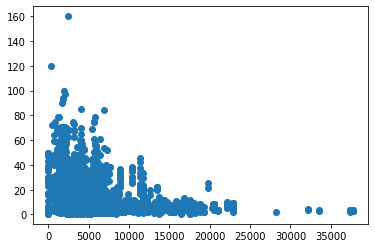

In [119]:
plt.scatter(df_train['Mileage_Float'] * df_train['Mileage_Float'] * df_train['Mileage_Float'], df_train['Price'])

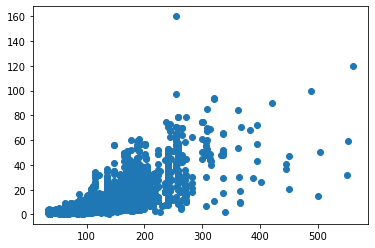

In [120]:
plt.scatter(df_train['Power_Float'], df_train['Price'])

In [121]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_Name,Mileage_Float,Engine_Int,Power_Float
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968,140.80


In [122]:
ohe_cols.append('Seats')

In [123]:
ohe_cols

['Company_Name', 'Fuel_Type', 'Transmission', 'Location', 'Seats']

In [124]:
ohe = OneHotEncoder()
transformed_cols = ohe.fit_transform(df_train[ohe_cols])
ohe.categories_

[array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
        'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
        'Jeep', 'Lamborghini', 'Land Rover', 'Mahindra', 'Maruti',
        'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche',
        'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object),
 array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
        'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
       dtype=object),
 array([2., 5., 7.])]

In [125]:
print(transformed_cols.toarray())

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [126]:
cols = []
for item in ohe.categories_:
    cols.extend(item.tolist())

In [127]:
cols[-1] = 'Seats_' + str(cols[-1])
cols[-2] = 'Seats_' + str(cols[-2])
cols[-3] = 'Seats_' + str(cols[-3])
cols

['Ambassador',
 'Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'Land Rover',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Renault',
 'Skoda',
 'Smart',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo',
 'CNG',
 'Diesel',
 'LPG',
 'Petrol',
 'Automatic',
 'Manual',
 'Ahmedabad',
 'Bangalore',
 'Chennai',
 'Coimbatore',
 'Delhi',
 'Hyderabad',
 'Jaipur',
 'Kochi',
 'Kolkata',
 'Mumbai',
 'Pune',
 'Seats_2.0',
 'Seats_5.0',
 'Seats_7.0']

In [128]:
transformed_cols.shape

(5981, 50)

In [129]:
len(cols)

50

In [130]:
encoded_df = pd.DataFrame(transformed_cols.toarray(), columns = cols)
encoded_df.head()

,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Lamborghini,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,CNG,Diesel,LPG,Petrol,Automatic,Manual,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Seats_2.0,Seats_5.0,Seats_7.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [131]:
encoded_df.columns

Index(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat',
       'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Lamborghini', 'Land Rover', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo', 'CNG', 'Diesel', 'LPG',
       'Petrol', 'Automatic', 'Manual', 'Ahmedabad', 'Bangalore', 'Chennai',
       'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata',
       'Mumbai', 'Pune', 'Seats_2.0', 'Seats_5.0', 'Seats_7.0'],
      dtype='object')

In [132]:
encoded_df.drop(['Manual'], axis = 1, inplace = True)

In [133]:
df_train.drop(drop_cols, axis = 1, inplace = True)

In [134]:
df_train.head()

,Year,Kilometers_Driven,Owner_Type,Price,Mileage_Float,Engine_Int,Power_Float
0,2010,72000,First,1.75,26.60,998,58.16
1,2015,41000,First,12.50,19.67,1582,126.20
2,2011,46000,First,4.50,18.20,1199,88.70
3,2012,87000,First,6.00,20.77,1248,88.76
4,2013,40670,Second,17.74,15.20,1968,140.80


In [135]:
df_train['Year'].replace(replace_dict['Year'],  inplace = True)
df_train['Owner_Type'].replace(replace_dict['Owner_Type'], inplace = True)

In [136]:
df_train.head()

,Year,Kilometers_Driven,Owner_Type,Price,Mileage_Float,Engine_Int,Power_Float
0,12,72000,3,1.75,26.60,998,58.16
1,17,41000,3,12.50,19.67,1582,126.20
2,13,46000,3,4.50,18.20,1199,88.70
3,14,87000,3,6.00,20.77,1248,88.76
4,15,40670,2,17.74,15.20,1968,140.80


In [137]:
df_train['Kilometers_Driven'] = log_kd.T
df_train['Engine_Int'] = log_power_clip.T
df_train['Mileage_Float'] = np.square(standardized_mileage).T

In [138]:
df_train.head()

,Year,Kilometers_Driven,Owner_Type,Price,Mileage_Float,Engine_Int,Power_Float
0,12,11.184435,3,1.75,3.464248,4.080246,58.16
1,17,10.621352,3,12.50,0.109050,4.845761,126.20
2,13,10.736418,3,4.50,0.000030,4.496471,88.70
3,14,11.373675,3,6.00,0.328611,4.497139,88.76
4,15,10.613271,2,17.74,0.432064,4.954418,140.80


In [139]:
df_train.shape

(5981, 7)

In [140]:
final_df = pd.concat([df_train.reset_index(drop = True), encoded_df.reset_index(drop = True)], axis = 1)

In [141]:
final_df.shape

(5981, 56)

In [142]:
final_df.head()

,Year,Kilometers_Driven,Owner_Type,Price,Mileage_Float,Engine_Int,Power_Float,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Lamborghini,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,CNG,Diesel,LPG,Petrol,Automatic,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Seats_2.0,Seats_5.0,Seats_7.0
0,12,11.184435,3,1.75,3.464248,4.080246,58.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,17,10.621352,3,12.50,0.109050,4.845761,126.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,13,10.736418,3,4.50,0.000030,4.496471,88.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,14,11.373675,3,6.00,0.328611,4.497139,88.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,15,10.613271,2,17.74,0.432064,4.954418,140.80,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [143]:
y = bcp.reshape(-1, 1)
final_df.drop(['Price'], axis = 1, inplace = True)

In [144]:
y

array([[0.5356793 ],
       [2.08412103],
       [1.33930751],
       ...,
       [0.98028426],
       [0.90349854],
       [0.85328549]])

In [145]:
final_df.head()

,Year,Kilometers_Driven,Owner_Type,Mileage_Float,Engine_Int,Power_Float,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Lamborghini,Land Rover,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,CNG,Diesel,LPG,Petrol,Automatic,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Seats_2.0,Seats_5.0,Seats_7.0
0,12,11.184435,3,3.464248,4.080246,58.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,17,10.621352,3,0.109050,4.845761,126.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,13,10.736418,3,0.000030,4.496471,88.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,14,11.373675,3,0.328611,4.497139,88.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,15,10.613271,2,0.432064,4.954418,140.80,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [146]:
mms = MinMaxScaler()
X = mms.fit_transform(final_df.values)

In [147]:
y_mms = MinMaxScaler()
y = y_mms.fit_transform(y.reshape(-1, 1))

In [148]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [149]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = y_mms.inverse_transform(lr.predict(X_val))

In [150]:
r = Ridge()
r.fit(X_train, y_train)
y_pred_r = y_mms.inverse_transform(r.predict(X_val).reshape(-1, 1))

In [151]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = y_mms.inverse_transform(svr.predict(X_val).reshape(-1, 1))

/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [152]:
lsvr = LinearSVR()
lsvr.fit(X_train, y_train)
y_pred_lsvr = y_mms.inverse_transform(lsvr.predict(X_val).reshape(-1, 1))

/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/sarvesh/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [153]:
def inverse_boxcox(y_res):
    return (p_lambda * y_res + 1) ** (1 / p_lambda)

In [154]:
y_pred_lr = inverse_boxcox(y_pred_lr)
y_pred_lr

array([[47.69576443],
       [ 2.7705057 ],
       [ 8.26756342],
       ...,
       [ 3.8478393 ],
       [ 5.61047114],
       [ 3.89127575]])

In [155]:
y_pred_r = inverse_boxcox(y_pred_r)
y_pred_r

array([[47.67911492],
       [ 2.81290791],
       [ 8.13656113],
       ...,
       [ 3.84628236],
       [ 5.56866928],
       [ 3.95273693]])

In [156]:
y_pred_svr = inverse_boxcox(y_pred_svr)
y_pred_svr

array([[33.99610956],
       [ 2.96912143],
       [ 7.44060279],
       ...,
       [ 3.36603009],
       [ 4.978149  ],
       [ 4.1553642 ]])

In [157]:
y_pred_lsvr = inverse_boxcox(y_pred_lsvr)
y_pred_lsvr

array([[39.22579779],
       [ 2.79184302],
       [ 9.3907051 ],
       ...,
       [ 3.73928837],
       [ 5.48266726],
       [ 3.9346308 ]])

In [158]:
print('Linear Regression : {}'.format(math.sqrt(mean_squared_error(y_val, y_pred_lr))))
print('Ridge : {}'.format(math.sqrt(mean_squared_error(y_val, y_pred_r))))
print('SVR : {}'.format(math.sqrt(mean_squared_error(y_val, y_pred_svr))))
print('LSVR : {}'.format(math.sqrt(mean_squared_error(y_val, y_pred_lsvr))))

Linear Regression : 15.403714411728068
Ridge : 15.72354510089737
SVR : 11.218253826979426
LSVR : 14.267613783903176


In [160]:
with open('svr.pickle', 'wb') as f:
    pickle.dump(svr, f)
with open('feature_scaler.pickle', 'wb') as f:
    pickle.dump(mms, f)
with open('target_scaler.pickle', 'wb') as f:
    pickle.dump(y_mms, f)
with open('one_hot_encoder.pickle', 'wb') as f:
    pickle.dump(ohe, f)

In [165]:
result_dict = dict()
result_dict['target_lambda'] = p_lambda
result_dict['power_clip'] = pow_clip
result_dict['mileage_mean'] = mileage_mean
result_dict['mileage_std'] = mileage_std
result_dict['ordered_ohe_cols'] = cols
result_dict['Year'] = {int(key): value for key, value in replace_dict['Year'].items()}
result_dict['Owner_Type'] = replace_dict['Owner_Type']
with open('utilities.json', 'w') as f:
    json.dump(result_dict, f)